In [2]:
# Importing required packages.
import numpy as np
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
from __future__ import print_function
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
# from sklearn.neural_network import MLPRegressor
from math import sqrt

In [3]:
# Loading dataset
wine = pd.read_csv('../input/winequality-white.csv', sep=';')

# Let's check how the data is distributed
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wine.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [6]:
# Information about the data columns:
# 1 - fixed acidity;
# 2 - volatile acidity;
# 3 - citric acid;
# 4 - residual sugar;
# 5 - chlorides;
# 6 - free sulfur dioxide;
# 7 - total sulfur dioxide;
# 8 - density;
# 9 - pH;
# 10 - sulphates;
# 11 - alcohol.
# 
# Output variable(based on sensory data):
# 12 - quality(score between 0 and 10).

wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


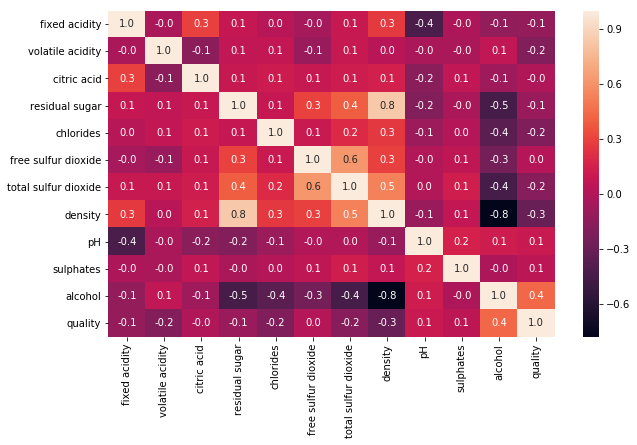

In [8]:
fig = plt.figure(figsize=(10, 6))
sns.heatmap(wine.corr(), annot=True, fmt='.1f')

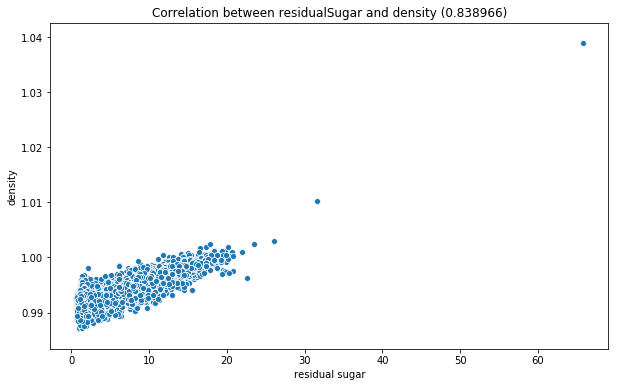

In [9]:
fig = plt.figure(figsize=(10, 6))
plt.title('Correlation between residualSugar and density (0.838966)')
sns.scatterplot(x='residual sugar', y='density', data=wine)

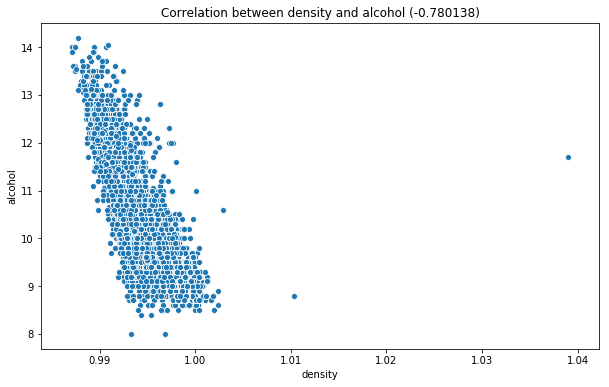

In [10]:
fig = plt.figure(figsize=(10, 6))
plt.title('Correlation between density and alcohol (-0.780138)')
sns.scatterplot(x='density', y='alcohol', data=wine)

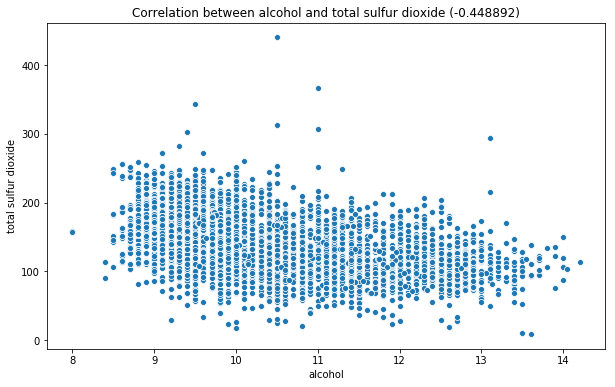

In [11]:
# No correlation between alcohol and total sulfur dioxide
fig = plt.figure(figsize=(10, 6))
plt.title('Correlation between alcohol and total sulfur dioxide (-0.448892)')
sns.scatterplot(x='alcohol', y='total sulfur dioxide', data=wine)

In [12]:
# Histogram of wine quality distribution (output values)
wine['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

(array([  20.,  163., 1457., 2198.,  880.,  175.,    5.]),
 array([3.        , 3.85714286, 4.71428571, 5.57142857, 6.42857143,
        7.28571429, 8.14285714, 9.        ]),
 <a list of 7 Patch objects>)

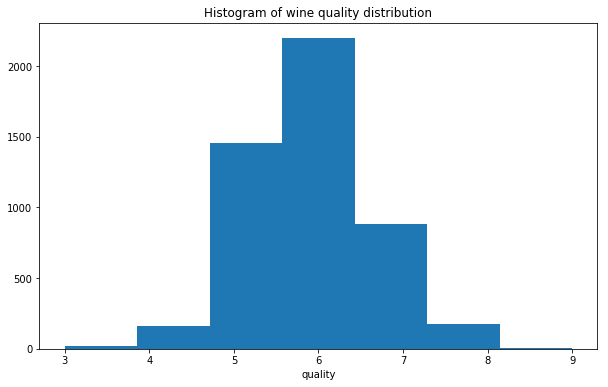

In [13]:
fig = plt.figure(figsize=(10, 6))
plt.title('Histogram of wine quality distribution')
plt.xlabel('quality')
plt.hist(wine['quality'], bins=7)

/Users/aygulmardanova/anaconda3/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



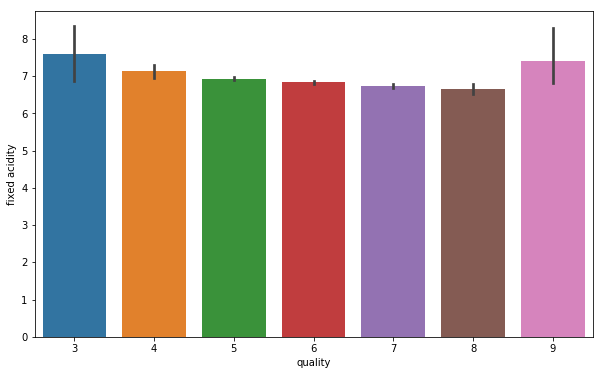

In [14]:
# Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='fixed acidity', data=wine)

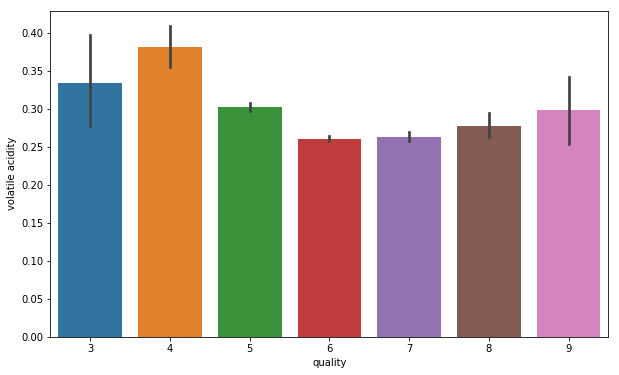

In [15]:
# Here we see that its quite a downing trend in the volatile acidity as we go higher the quality
fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='volatile acidity', data=wine)

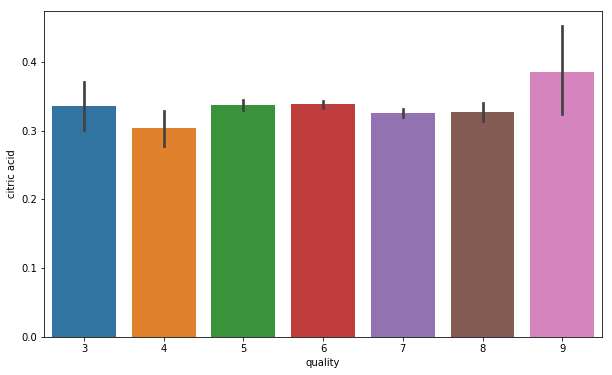

In [16]:
# Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='citric acid', data=wine)

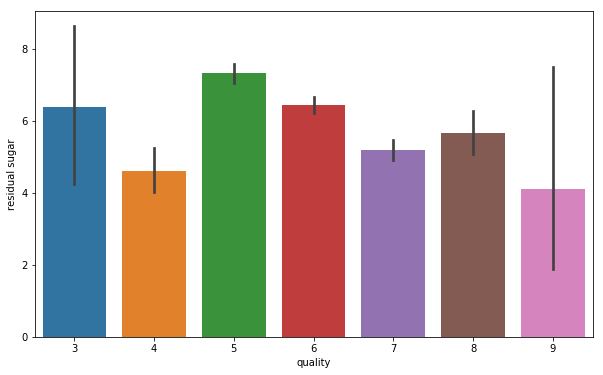

In [17]:
fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='residual sugar', data=wine)

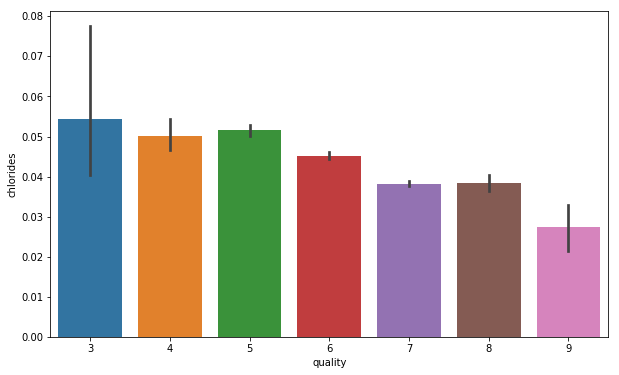

In [18]:
# Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='chlorides', data=wine)

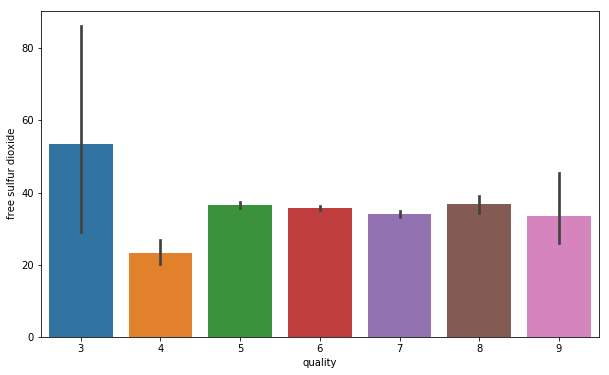

In [19]:
fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='free sulfur dioxide', data=wine)

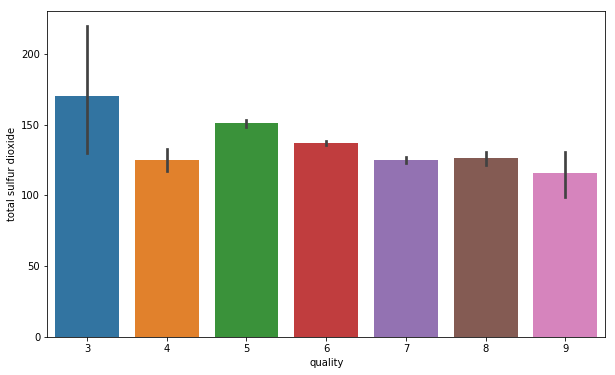

In [20]:
fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='total sulfur dioxide', data=wine)

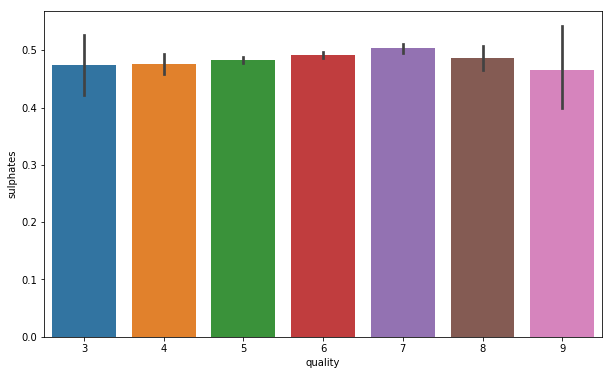

In [21]:
# Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='sulphates', data=wine)

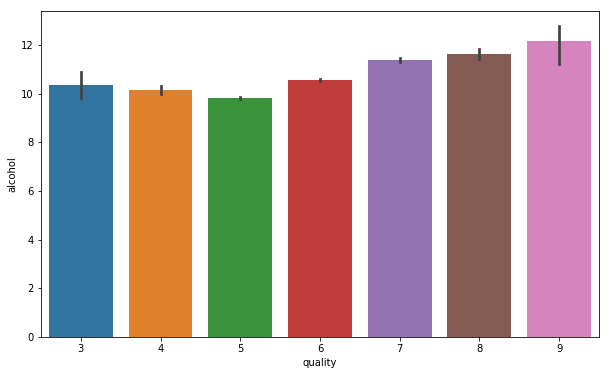

In [22]:
# Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='alcohol', data=wine)

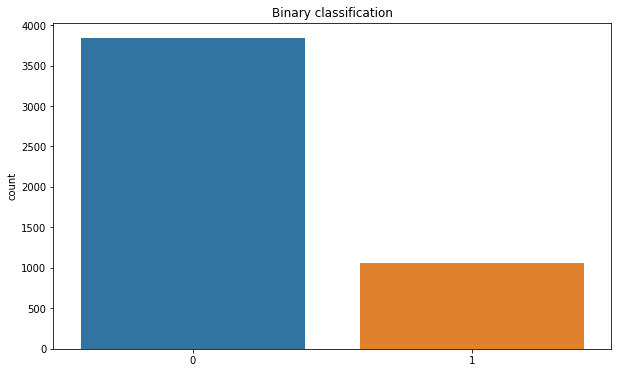

In [23]:
# Binary classification (bad / good)

# Preprocessing Data for performing Machine learning algorithms
# Making binary classification for the response variable.
# Dividing wine as good and bad by giving the limit for the quality
# quality (2,6] -> bad; (6, 9] -> good
bins = (2, 6, 9)
group_names = ['bad', 'good']
qualityClassification = pd.cut(wine['quality'], bins=bins, labels=group_names)

# Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

# Bad becomes 0 (1) and good becomes 1 (2)
qualityClassification = label_quality.fit_transform(qualityClassification)

fig = plt.figure(figsize=(10, 6))
plt.title('Binary classification')
sns.countplot(qualityClassification)

In [24]:
# Prepare dataset to perform ML algorithms
# Define feature variables and response variable
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
target = ['quality']

# Separate dataset
X = wine[features]
y = wine[target]

# Split data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)
np.set_printoptions(precision=3)

In [25]:
# Apply Standard scaling to get optimized result
# Standardize features by removing the mean and scaling to unit variance. 
# The standard score of a sample x is calculated as: z = (x - u) / s, where 
# u - the mean of the training samples, s - the standard deviation of the training samples.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [26]:
###
# Random Forest Classifier
# A random forest is a meta estimator that fits a number of decision tree classifiers on various
# sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
# The sub-sample size is always the same as the original input sample size
# but the samples are drawn with replacement if bootstrap=True (default).
# n_estimators - The number of trees on the forest

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, np.ravel(y_train))
pred_rfc = rfc.predict(X_test)
# print some values (correct and predicted ones)
print('correct:  ', np.ravel(y_test.values[0:15]))
print('predicted:', pred_rfc[0:15])

correct:   [5 6 7 6 5 6 6 7 6 5 4 6 6 5 6]
predicted: [5 6 7 6 5 6 6 7 6 5 6 6 6 6 6]


In [27]:
# print quality labels
for i in range(3,10):
    print('     ' + str(i), end='')
print('\n')
pred_prob = rfc.predict_proba(X_test)[0:15]
# print correct result and predicted probabilities for each value
for i in range(0,15):
    print(y_test.values[i], pred_prob[i])

     3     4     5     6     7     8     9

[5] [0.    0.04  0.87  0.085 0.005 0.    0.   ]
[6] [0.    0.015 0.11  0.775 0.1   0.    0.   ]
[7] [0.005 0.025 0.04  0.335 0.44  0.155 0.   ]
[6] [0.01 0.07 0.11 0.72 0.09 0.   0.  ]
[5] [0.    0.005 0.62  0.37  0.005 0.    0.   ]
[6] [0.085 0.01  0.225 0.46  0.19  0.03  0.   ]
[6] [0.    0.01  0.155 0.585 0.195 0.055 0.   ]
[7] [0.    0.02  0.08  0.415 0.465 0.02  0.   ]
[6] [0.    0.005 0.33  0.665 0.    0.    0.   ]
[5] [0.    0.09  0.535 0.3   0.07  0.005 0.   ]
[4] [0.    0.055 0.26  0.44  0.195 0.05  0.   ]
[6] [0.01  0.01  0.33  0.5   0.105 0.045 0.   ]
[6] [0.005 0.005 0.21  0.565 0.2   0.015 0.   ]
[5] [0.    0.03  0.435 0.53  0.005 0.    0.   ]
[6] [0.    0.    0.16  0.805 0.035 0.    0.   ]


In [28]:
# Random Forest Classifier -> accuracy of 70%
# for classification using 2 labels (instead of 7 -> accuracy of 88%)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.73      0.22      0.34        36
           5       0.69      0.67      0.68       260
           6       0.70      0.83      0.76       480
           7       0.76      0.59      0.66       168
           8       0.77      0.31      0.44        32
           9       0.00      0.00      0.00         1

   micro avg       0.71      0.71      0.71       980
   macro avg       0.52      0.38      0.41       980
weighted avg       0.71      0.71      0.69       980



/Users/aygulmardanova/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [29]:
# Confusion matrix for the random forest classification
# The diagonal elements - the number of points for which the predicted label is equal to the true label
# off-diagonal elements - mislabeled by the classifier.
print(confusion_matrix(y_test, pred_rfc))

[[  0   0   2   1   0   0   0]
 [  0   8  18  10   0   0   0]
 [  0   2 175  83   0   0   0]
 [  0   1  55 400  23   1   0]
 [  0   0   2  65  99   2   0]
 [  0   0   0  14   8  10   0]
 [  0   0   0   0   1   0   0]]


In [51]:
###
# Stochastic Gradient Descent Classifier
# The advantages of SGD:
# - Efficiency.
# - Ease of implementation (lots of opportunities for code tuning).
# The disadvantages of SGD:
# - SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.
# - SGD is sensitive to feature scaling.

sgd = SGDClassifier(penalty="elasticnet", max_iter=2000, tol=0.00001, loss="modified_huber")
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)
# print(sgd.coef_)
# print some values (correct and predicted ones)
print('correct:  ', np.ravel(y_test.values[0:15]))
print('predicted:', np.ravel(pred_sgd[0:15]))

correct:   [5 6 7 6 5 6 6 7 6 5 4 6 6 5 6]
predicted: [5 5 6 6 5 5 6 4 6 5 5 5 7 5 6]


In [31]:
# print quality labels
for i in range(3,10):
    print('     ' + str(i), end='')
print('\n')
pred_prob = sgd.predict_proba(X_test)[0:15]
# print correct result and predicted probabilities for each value
for i in range(0,15):
    print(y_test.values[i], pred_prob[i])

     3     4     5     6     7     8     9

[5] [0.    0.051 0.597 0.351 0.    0.    0.   ]
[6] [0.    0.    0.35  0.357 0.293 0.    0.   ]
[7] [0.    0.361 0.    0.629 0.011 0.    0.   ]
[6] [0.    0.    0.112 0.609 0.279 0.    0.   ]
[5] [0. 0. 1. 0. 0. 0. 0.]
[6] [0.    0.247 0.023 0.672 0.058 0.    0.   ]
[6] [0.    0.    0.    0.586 0.414 0.    0.   ]
[7] [0.    0.341 0.    0.433 0.226 0.    0.   ]
[6] [0.   0.   0.72 0.   0.28 0.   0.  ]
[5] [0.    0.208 0.415 0.312 0.065 0.    0.   ]
[4] [0.    0.    0.948 0.    0.052 0.    0.   ]
[6] [0.    0.    0.508 0.323 0.169 0.    0.   ]
[6] [0.    0.044 0.146 0.582 0.19  0.039 0.   ]
[5] [0.    0.    0.776 0.197 0.027 0.    0.   ]
[6] [0.    0.    0.145 0.385 0.173 0.297 0.   ]


In [32]:
# Stochastic Gradient Descent Classifier -> accuracy of 51%
# for classification using 2 labels (instead of 7 -> accuracy of 77%)
print(classification_report(y_test, pred_sgd))

# 51% accuracy using stochastic gradient descent classifier
print(confusion_matrix(y_test, pred_sgd))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.14      0.22      0.17        36
           5       0.43      0.67      0.52       260
           6       0.52      0.46      0.49       480
           7       0.22      0.12      0.16       168
           8       0.00      0.00      0.00        32
           9       0.00      0.00      0.00         1

   micro avg       0.43      0.43      0.43       980
   macro avg       0.19      0.21      0.19       980
weighted avg       0.41      0.43      0.41       980

[[  0   0   2   0   1   0   0]
 [  0   8  20   8   0   0   0]
 [  0  24 174  50  12   0   0]
 [  0  24 182 219  53   1   1]
 [  0   2  23 123  20   0   0]
 [  0   0   6  22   4   0   0]
 [  0   0   0   1   0   0   0]]


In [33]:
###
# Support Vector Classifier
# fit time complexity is more than quadratic with the number of samples -> hard to scale more than 10000 samples.
# probability=True - to use predict_proba method

svc = SVC(probability=True)
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
# print some values (correct and predicted ones)
print('correct:  ', np.ravel(y_test.values[0:15]))
print('predicted:', pred_svc[0:15])

correct:   [5 6 7 6 5 6 6 7 6 5 4 6 6 5 6]
predicted: [5 6 6 6 5 6 6 6 5 5 6 6 6 5 6]


In [34]:
# print quality labels
for i in range(3,10):
    print('     ' + str(i), end='')
print('\n')
pred_prob = svc.predict_proba(X_test)[0:15]
# print correct result and predicted probabilities for each value
for i in range(0,15):
    print(y_test.values[i], pred_prob[i])

     3     4     5     6     7     8     9

[5] [3.723e-03 3.306e-02 7.949e-01 1.501e-01 1.293e-02 4.879e-03 3.862e-04]
[6] [0.005 0.042 0.271 0.584 0.081 0.015 0.002]
[7] [0.005 0.025 0.06  0.592 0.216 0.099 0.003]
[6] [0.014 0.05  0.226 0.551 0.14  0.017 0.001]
[5] [0.003 0.04  0.738 0.196 0.019 0.003 0.001]
[6] [0.005 0.016 0.128 0.618 0.194 0.038 0.001]
[6] [0.002 0.01  0.119 0.697 0.147 0.025 0.001]
[7] [0.002 0.018 0.139 0.619 0.178 0.042 0.001]
[6] [0.004 0.038 0.665 0.236 0.051 0.005 0.002]
[5] [0.002 0.02  0.686 0.248 0.036 0.008 0.001]
[4] [0.003 0.032 0.257 0.531 0.161 0.014 0.001]
[6] [0.002 0.027 0.214 0.637 0.096 0.022 0.002]
[6] [0.003 0.009 0.247 0.563 0.151 0.025 0.002]
[5] [0.003 0.036 0.514 0.393 0.048 0.006 0.001]
[6] [0.003 0.008 0.175 0.708 0.08  0.025 0.001]


In [35]:
# Support Vector Classifier -> accuracy of 57%
# for classification using 2 labels (instead of 7 -> accuracy of 81%)
print(classification_report(y_test, pred_svc))

print(confusion_matrix(y_test, pred_svc))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       1.00      0.06      0.11        36
           5       0.54      0.63      0.58       260
           6       0.59      0.72      0.65       480
           7       0.59      0.32      0.41       168
           8       0.00      0.00      0.00        32
           9       0.00      0.00      0.00         1

   micro avg       0.58      0.58      0.58       980
   macro avg       0.39      0.25      0.25       980
weighted avg       0.57      0.58      0.55       980

[[  0   0   2   1   0   0   0]
 [  0   2  23  10   1   0   0]
 [  0   0 164  94   2   0   0]
 [  0   0 109 347  24   0   0]
 [  0   0   6 109  53   0   0]
 [  0   0   0  22  10   0   0]
 [  0   0   0   1   0   0   0]]


In [36]:
# ###
# # Let's try to increase our accuracy of models
# # Grid Search CV
# # 
# # Finding best parameters for our SVC model
# param = {
#     'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
#     'kernel': ['linear', 'rbf'],
#     'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]
# }
# grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)
# grid_svc.fit(X_train, y_train)

In [37]:
# # Best parameters for our svc model
# print(grid_svc.best_params_)

# pred_prob = grid_svc.predict_proba(X_test)[0:15]
# # print correct result and predicted probabilities for each value
# for i in range(0,15):
#     print(y_test.values[i], pred_prob[i])

In [38]:
# # Let's run our SVC again with the best parameters.
# # SVC improves from 81% to 85% using Grid Search CV
# svc2 = SVC(C=1.2, gamma=0.9, kernel='rbf')
# svc2.fit(X_train, y_train)
# pred_svc2 = svc2.predict(X_test)
# print(classification_report(y_test, pred_svc2))

In [39]:
# # Cross Validation Score for random forest and SGD

# # Now lets try to do some evaluation for random forest model using cross validation.
# rfc_eval = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=10)
# print(rfc_eval.mean())

In [40]:
# Regression
# - classification - define class of an object by analysing its characteristics.
# in classification set of output classes is already defined
# - regression - similar to classification task, is used to define output value of some parameter 
# according to known values of characteristics.
# in comparison with classification, output IS NOT a defined set of values, output - set of real numbers.

In [41]:
###
# Linear regression (OLS - ordinary least squares)
# Fit on train set
lr = LinearRegression()
lr.fit(X_train, y_train)
# coef_ - is an array of 11 elements (since 11 features)
print(np.ravel(lr.coef_))

[ 0.056 -0.182  0.01   0.424 -0.003  0.059 -0.014 -0.461  0.107  0.075
  0.238]


In [42]:
# Predict on test data
y_prediction = lr.predict(X_test)
# correct result; round of prediction, prediction
for i in range(0,15):
    print(y_test.values[i], round(y_prediction[i], 0), ' <- ', y_prediction[i])

[5] 5.0  <-  [5.186]
[6] 6.0  <-  [5.555]
[7] 7.0  <-  [6.593]
[6] 6.0  <-  [5.897]
[5] 5.0  <-  [5.202]
[6] 6.0  <-  [6.101]
[6] 6.0  <-  [6.064]
[7] 6.0  <-  [6.268]
[6] 5.0  <-  [5.487]
[5] 6.0  <-  [5.582]
[4] 6.0  <-  [5.946]
[6] 6.0  <-  [5.561]
[6] 6.0  <-  [6.075]
[5] 6.0  <-  [5.646]
[6] 6.0  <-  [6.327]


In [43]:
print('R^2: ', lr.score(X_test, y_test))

R^2:  0.2758865147119731


In [44]:
# Evaluate Linear Regression accuracy using root-mean-square-error (RMSE) = 0,731
# In linear regression, the outcome (dependent variable) is continuous.
# It can have any one of an infinite number of possible values.
# In logistic regression, the outcome (dependent variable) has only a limited number of possible values.
RMSE = sqrt(mean_squared_error(y_true=y_test, y_pred=y_prediction))
print('RMSE: ', RMSE)

RMSE:  0.731677791244


In [45]:
print('squared errors: ', 
      round(sum(np.ravel(abs(y_test - np.around(y_prediction)))) / len(y_test), 3))

squared errors:  0.526


In [46]:
###
# Polynomial regression
# Fit on train set
model = PolynomialFeatures(degree=2)
X_train_ = model.fit_transform(X_train)
X_test_ = model.fit_transform(X_test)

plr = LinearRegression()
plr.fit(X_train_, y_train)
predicted_data = plr.predict(X_test_)


# predicted_data = np.round_(predicted_data)
# correct result; round of prediction, prediction
for i in range(0,15):
    print(y_test.values[i], round(predicted_data[i], 0), ' <- ', predicted_data[i])

[5] 5.0  <-  [5.267]
[6] 6.0  <-  [5.672]
[7] 7.0  <-  [6.611]
[6] 6.0  <-  [5.749]
[5] 5.0  <-  [5.18]
[6] 6.0  <-  [6.108]
[6] 6.0  <-  [5.976]
[7] 6.0  <-  [6.107]
[6] 5.0  <-  [5.5]
[5] 5.0  <-  [5.362]
[4] 6.0  <-  [6.018]
[6] 6.0  <-  [5.668]
[6] 6.0  <-  [6.003]
[5] 6.0  <-  [5.62]
[6] 6.0  <-  [6.141]


In [47]:
# Evaluate accuracy for Polynomial Regression using (RMSE)
# degree = 2 => RMSE = 0,71
# degree = 3 => RMSE = 0,715
# degree = 4 => RMSE = 12,345
RMSE = sqrt(mean_squared_error(y_true=y_test, y_pred=predicted_data))
print('RMSE: ', RMSE)

RMSE:  0.710250880811


In [48]:
# Evaluate squared errors for Polynomial Regression using (RMSE)
# degree = 2 => sqErr = 0,499
# degree = 3 => sqErr = 0,515
# degree = 4 => sqErr = 1.273
print('squared errors: ', 
      round(sum(np.ravel(abs(y_test - np.around(predicted_data)))) / len(y_test), 3))

squared errors:  0.499


In [94]:
# Train Model
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rfg = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rfg.fit(X_train, np.ravel(y_train));

# Make Predictions on Test Data
# Use the forest's predict method on the test data
y_prediction = rfg.predict(X_test)

# correct result; round of prediction, prediction
for i in range(0,15):
    print(y_test.values[i], round(y_prediction[i], 0), ' <- ', y_prediction[i])

[5] 5.0  <-  5.079
[6] 6.0  <-  5.919
[7] 7.0  <-  6.825
[6] 6.0  <-  5.903
[5] 5.0  <-  5.355
[6] 5.0  <-  4.623
[6] 6.0  <-  6.251
[7] 7.0  <-  6.524
[6] 6.0  <-  5.722
[5] 5.0  <-  5.204
[4] 6.0  <-  5.981
[6] 6.0  <-  5.932
[6] 6.0  <-  5.994
[5] 6.0  <-  5.551
[6] 6.0  <-  5.858


In [93]:
# results are better than for Linear regression:
# R^2 = 0,276; RMSE = 0,73; sq errors = 0,526
print('R^2: ', rfg.score(X_test, y_test))

R^2:  0.5076251475401525


In [95]:
# Evaluate Linear Regression accuracy using root-mean-square-error (RMSE) = 0,731
# In linear regression, the outcome (dependent variable) is continuous.
# It can have any one of an infinite number of possible values.
# In logistic regression, the outcome (dependent variable) has only a limited number of possible values.
RMSE = sqrt(mean_squared_error(y_true=y_test, y_pred=y_prediction))
print('RMSE: ', RMSE)

RMSE:  0.603343289936


In [97]:
print('squared errors: ', 
      round(sum(np.ravel(abs(np.ravel(y_test) - np.around(y_prediction)))) / len(y_test), 3))

squared errors:  0.341


In [58]:
# Calculate the absolute errors
errors = abs(np.ravel(y_prediction) - np.ravel(y_test))

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.43 degrees.


In [62]:
# Determine Performance Metrics
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (np.ravel(errors) / np.ravel(y_test))

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 92.31 %.


In [79]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 23


In [99]:
# Variable Importances
# Get numerical feature importances
importances = list(rfg.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: alcohol              Importance: 0.25
Variable: volatile acidity     Importance: 0.12
Variable: free sulfur dioxide  Importance: 0.12
Variable: fixed acidity        Importance: 0.07
Variable: residual sugar       Importance: 0.07
Variable: total sulfur dioxide Importance: 0.07
Variable: pH                   Importance: 0.07
Variable: citric acid          Importance: 0.06
Variable: chlorides            Importance: 0.06
Variable: density              Importance: 0.06
Variable: sulphates            Importance: 0.06


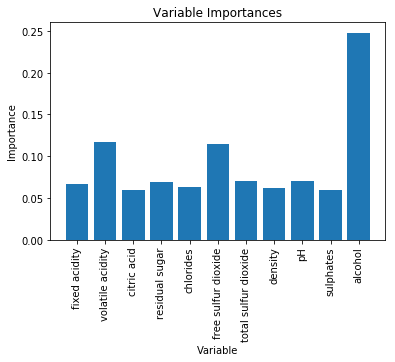

In [84]:
# Visualizations
# Variable Importances
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, features, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Feature Importances');

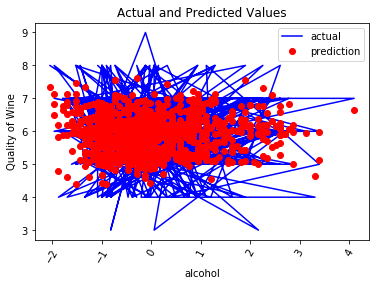

In [114]:
plt.plot(X_test[:,9], y_test, 'b-', label = 'actual')

# Plot the predicted values
plt.plot(X_test[:,9], y_prediction, 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('alcohol'); plt.ylabel('Quality of Wine'); plt.title('Actual and Predicted Values');


In [125]:
X_test['alcohol']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [127]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor


reg1 = GradientBoostingRegressor(random_state=1, n_estimators=10)
reg2 = RandomForestRegressor(random_state=1, n_estimators=10)
reg3 = LinearRegression()
ereg = VotingRegressor([('gb', reg1), ('rf', reg2), ('lr', reg3)])
reg1.fit(X, y)
reg2.fit(X, y)
reg3.fit(X, y)
ereg.fit(X, y)

xt = X[:20]

plt.figure()
plt.plot(reg1.predict(xt), 'gd', label='GradientBoostingRegressor')
plt.plot(reg2.predict(xt), 'b^', label='RandomForestRegressor')
plt.plot(reg3.predict(xt), 'ys', label='LinearRegression')
plt.plot(ereg.predict(xt), 'r*', label='VotingRegressor')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Comparison of individual predictions with averaged')
plt.show()

ImportError: cannot import name VotingRegressor